In [1]:
from datasets import load_dataset
import matplotlib.pyplot as plt
from wordcloud import WordCloud

/usr/local/envs/nlp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds = load_dataset('emotion')

Generating test split: 100%|██████████| 2000/2000 [00:00<00:00, 138900.34 examples/s]


### Dataset basic statistics

In [3]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

Dataset has 16000 texts in train, 2000 samples in validation set and 2000 samples in test set.

In [4]:
ds['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

Dataset has 6 classes.

In [5]:
ds['train'][:3]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong'],
 'label': [0, 0, 3]}

In [6]:
ds.set_format('pandas')
df_train = ds['train'][:]
df_train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [7]:
def label_int2str(row, int2str):
    return int2str(row['label'])

df_train['label name'] = df_train.apply(lambda row: label_int2str(row, int2str=ds['train'].features['label'].int2str), axis=1)
df_train.head()

,text,label,label name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


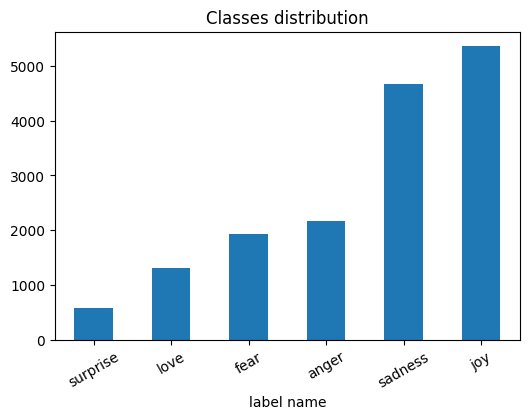

In [8]:
df_train['label name'].value_counts(ascending=True).plot.bar(figsize=(6, 4))
plt.title('Classes distribution')
plt.xticks(rotation=30)
plt.show()

Dataset is not balanced.

In [9]:
df_train['num words'] = df_train['text'].apply(lambda text: len(text.split(' ')))
df_train.head()

,text,label,label name,num words
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


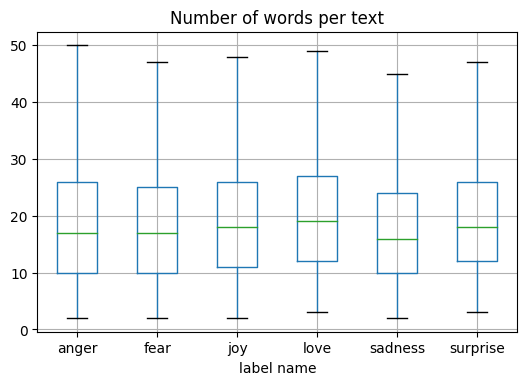

In [10]:
df_train.boxplot(
    'num words', by='label name', showfliers=False, figsize=(6, 4)
)
plt.title('Number of words per text')
plt.suptitle('')
plt.show()

In [31]:
def generate_word_cloud(df, class_name, word_cloud_generator):
    df_class = df[df['label name']==class_name]
    class_texts = [r['text'] for _, r in df_class.iterrows()]
    class_texts = ' '.join(class_texts)
    wordcloud = word_cloud_generator.generate(class_texts)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word cloud for {class_name} class')
    plt.axis("off")

word_cloud_generator = WordCloud()

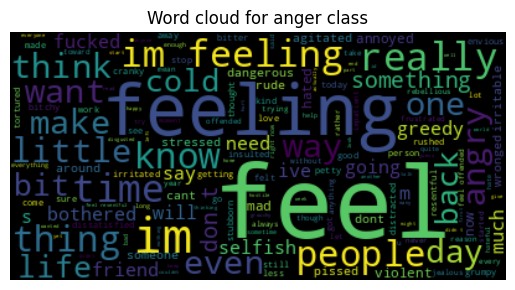

In [35]:
generate_word_cloud(df_train, 'anger', word_cloud_generator)

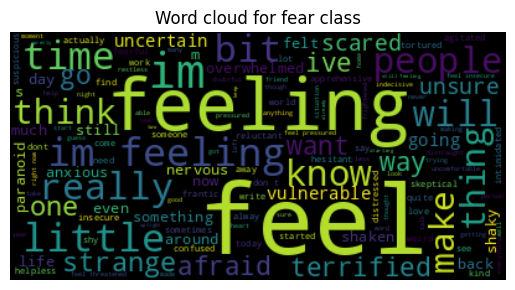

In [36]:
generate_word_cloud(df_train, 'fear', word_cloud_generator)

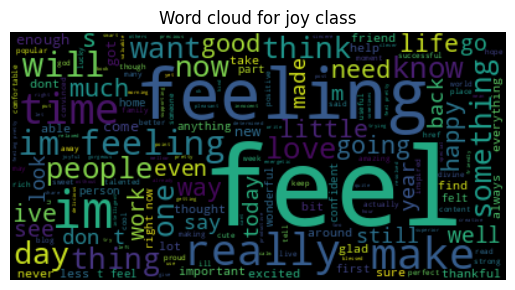

In [37]:
generate_word_cloud(df_train, 'joy', word_cloud_generator)

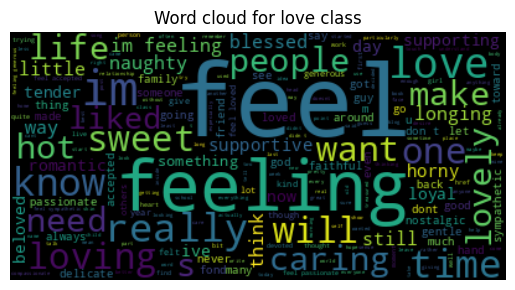

In [38]:
generate_word_cloud(df_train, 'love', word_cloud_generator)

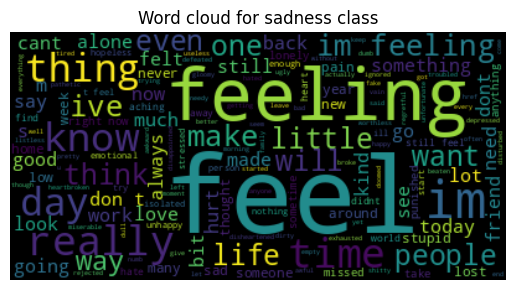

In [39]:
generate_word_cloud(df_train, 'sadness', word_cloud_generator)

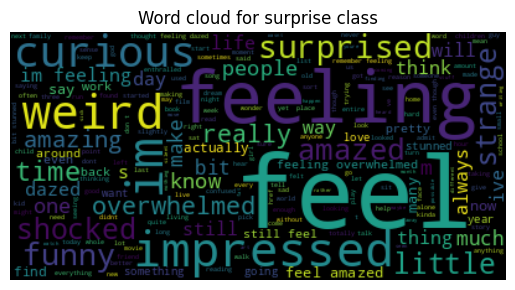

In [40]:
generate_word_cloud(df_train, 'surprise', word_cloud_generator)

In [70]:
def ds_special_chars(df):
    texts = [r['text'] for _, r in df.iterrows()]
    texts = ' '.join(texts)
    return list(set([c for c in texts if c.isalnum() is False]))

In [71]:
ds_special_chars(df_train)

[' ']

There are no special chars in the dataset.